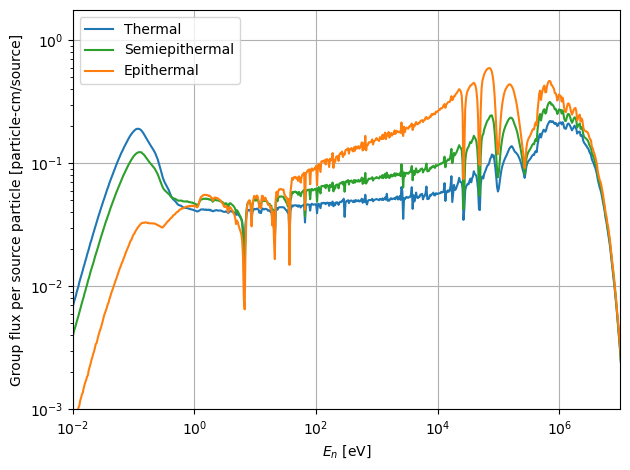

In [5]:
import openmc
import matplotlib.pyplot as plt
import os
import sys
TOOLS_PATH = f"{os.getenv('MASTER_PROJECT_ROOT_FOLDER')}/logistics"
sys.path.insert(0, TOOLS_PATH)
from tools import run_tools, nuclear_data_tools, model_tools

results_idx = {
    model_tools.THERMAL_REACTOR: 1,
    model_tools.SEMIEPITHERMAL_REACTOR: 3,
    model_tools.EPITHERMAL_REACTOR: 2,
}

colors = ["tab:blue", "tab:orange", "tab:green"]

# Define colors for colorblind people - magenta, black, blue
colorblind_colors = ["#e6194b", "#000000", "#4363d8"]


plt.figure(1)

folder_filename = lambda run_id: f"../results/RUNDATA_R14_{run_id}"

for REACTOR_MODEL, i in results_idx.items():
    run_settings = run_tools.load_run_settings_json(folder_filename(i))
    # color = colors[i-1]
    color = colors[i-1]

    # Make sure reactor_model is correct
    assert run_settings["reactor_model"] == REACTOR_MODEL

    statepoint_number = run_settings["active_batch_count"] + run_settings["inactive_batch_count"]
    sp = openmc.StatePoint(f"../results/RUNDATA_R14_{i}/statepoint.{statepoint_number}.h5")

    # print(sp.tallies)

    tallydf1=sp.tallies[3].get_pandas_dataframe()
    # print(tallydf1.head())

    tallydf1flux=tallydf1[tallydf1['score']=='flux']
    # print(tallydf1flux.head())

    energy=(tallydf1flux['energy low [eV]']+tallydf1flux['energy high [eV]'])/2
    
    plt.figure(1)
    # factor = 21205750.411731105
    plt.loglog(energy,tallydf1flux['mean'], label=REACTOR_MODEL.capitalize(), color=color)

    


    # deltaE=(tallydf1flux['energy high [eV]']-tallydf1flux['energy low [eV]'])
    # plt.figure(2)
    # plt.loglog(energy,tallydf1flux['mean']/deltaE,lw=2, label=labels[i])

    

plt.figure(1)
plt.xlabel('$E_n$ [eV]')
plt.ylabel('Group flux per source particle [particle-cm/source]')
plt.legend()
plt.xlim(1e-2, 1e7)
plt.ylim(bottom=1e-3)
plt.grid()
plt.tight_layout()
plt.savefig("group_plux_per_source_particle.pdf")


# plt.figure(2)
# plt.ylabel('Spectrum per source particle (1/eV)')
# plt.xlabel('Energy (eV)')
# plt.legend()
# plt.savefig("spectrum_per_source_particle.pdf")
    